In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import os

In [19]:
powerData = pd.read_csv("power.csv")

powerData["Spinup"] = powerData["Spinup 5v"] * 5 + powerData["Spinup 12v"] * 12
powerData["Idle"] = powerData["Idle 5v"] * 5 + powerData["Idle 12v"] * 12
powerData["Spundown"] = powerData["Spundown 5v"] * 5 + powerData["Spundown 12v"] * 12
powerData["Seqread"] = powerData["Seqread 5v"] * 5 + powerData["Seqread 12v"] * 12
powerData["Randrw"] = powerData["Randrw 5v"] * 5 + powerData["Randrw 12v"] * 12

#Average power breakdown .1% spinup, idle = 60%, seqRead = 15%, randread = 9.9%, spundown = 15%

avgPowerCost = .1688
highPowerCost = .5

powerData["Average Power"] = powerData['Spinup'] * 0.001 + powerData['Idle'] * 0.6 + powerData['Spundown'] * 0.15 + powerData["Randrw"] + 0.099 + powerData['Spundown'] * 0.15

powerData['avgCost'] = powerData["Average Power"] / 1000 * 24*365.25 * avgPowerCost # conver to KWH, multiply for a year, average US cost
powerData['highCost'] = powerData["Average Power"] / 1000 * 24*365.25 * highPowerCost # conver to KWH, multiply for a year, very high power costs


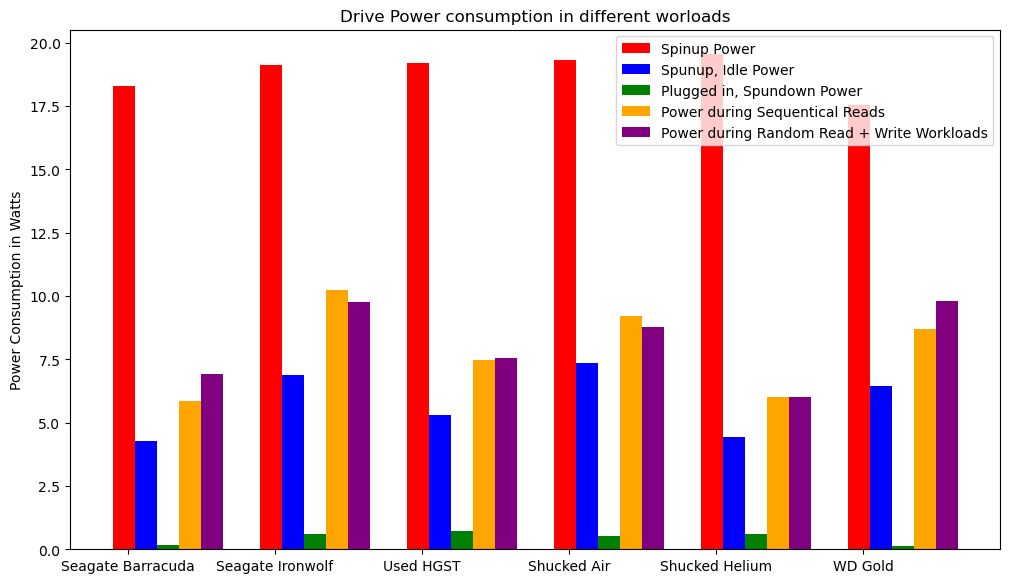

In [20]:
barWidth = .15

b1 = np.arange(len(powerData['Drive']))
b2 = [x + barWidth for x in b1]
b3 = [x + barWidth for x in b2]
b4 = [x + barWidth for x in b3]
b5 = [x + barWidth for x in b4]


plt.bar(b1,powerData['Spinup'],width=barWidth,color="r",label="Spinup Power")
plt.bar(b2,powerData['Idle'],width=barWidth,color="b",label='Spunup, Idle Power')
plt.bar(b3,powerData['Spundown'],width=barWidth,color="g",label='Plugged in, Spundown Power')
plt.bar(b4,powerData['Seqread'],width=barWidth,color="orange", label='Power during Sequentical Reads')
plt.bar(b5,powerData['Randrw'],width=barWidth,color="purple", label='Power during Random Read + Write Workloads')

plt.title("Drive Power consumption in different worloads")
plt.ylabel("Power Consumption in Watts")
plt.xticks([r + barWidth / 5 for r in range(len(powerData['Drive']))], powerData['Drive'])
#plt.style.use('tableau-colorblind10')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(12,6.75)
fig.savefig('powerBar.png',dpi=600)

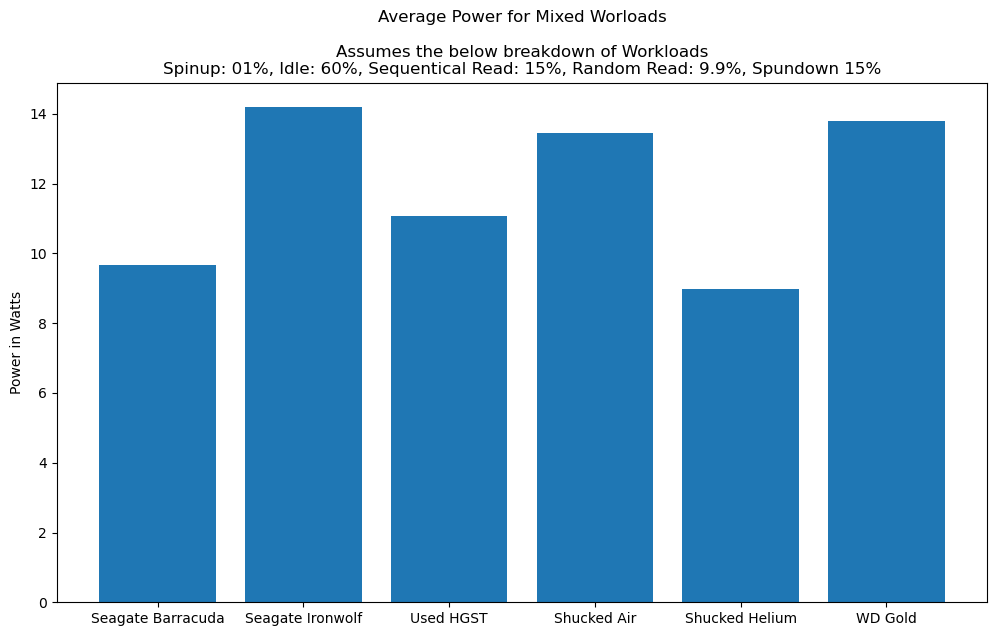

In [21]:
#average power usage

plt.bar(powerData['Drive'],powerData['Average Power'])

plt.title("Average Power for Mixed Worloads\n\nAssumes the below breakdown of Workloads\nSpinup: 01%, Idle: 60%, Sequentical Read: 15%, Random Read: 9.9%, Spundown 15%")

plt.ylabel("Power in Watts")

fig = plt.gcf()
fig.set_size_inches(12,6.75)
fig.savefig('averagePower.png',dpi=600)

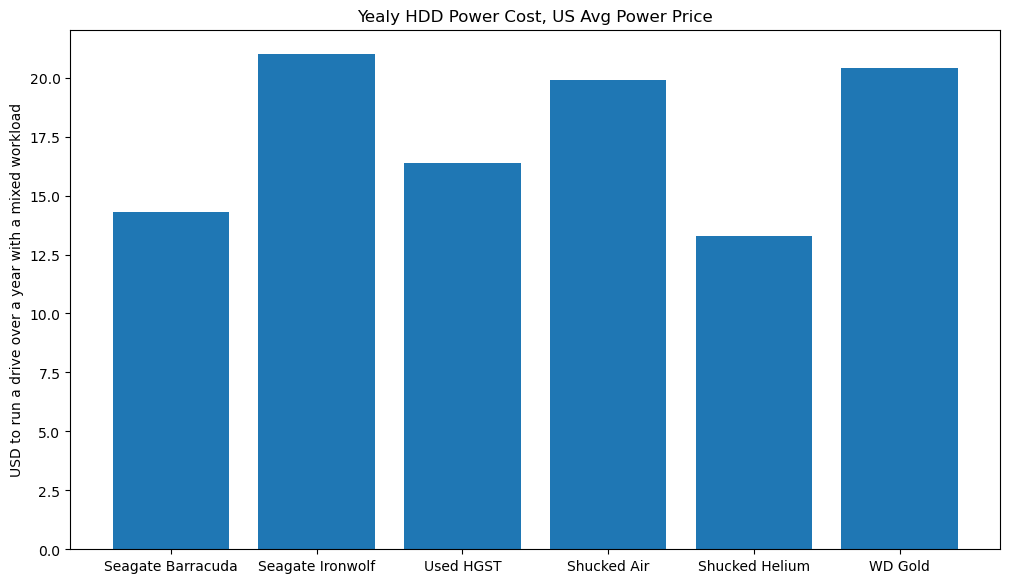

In [22]:
#average power usage

plt.bar(powerData['Drive'],powerData['avgCost'])

plt.title("Yealy HDD Power Cost, US Avg Power Price")

plt.ylabel("USD to run a drive over a year with a mixed workload")

fig = plt.gcf()
fig.set_size_inches(12,6.75)
fig.savefig('powerCost.png',dpi=600)